## 1.Setup Basic Parameters

In [1]:
# Step 1: Load and read the JSON file to extract new parameters
import json

# Path to the JSON file with new parameters
json_path = 'Data.json'

# Read the JSON file
with open(json_path, 'r') as file:
    parameters = json.load(file)

# Display the loaded parameters to confirm
parameters

{'TMax': 60,
 'D': 16,
 'L': 1,
 'ls': 10,
 'le': 20,
 'alfa': 0.6,
 'beta': 0.2,
 'gama': 0.3,
 'Connectivity Matrix W': {'Outside World-FP,Suva-FP': 3000,
  'Outside World1-AP,Nadi International-AP': 4500,
  'Denarau-FP,Group 4 (Tropica/Malolo/Likuliku/Castaway)-FP': 500,
  'Denarau-FP,Bounty Island-FP': 200,
  'Denarau-FP,Tokoriki Island-FP': 150,
  'Denarau-FP,Group 2 (Tadrai/Mana)-FP': 300,
  'Denarau-FP,Group 3 (Treasure/Beachconber)-FP': 200,
  'Denarau-FP,Matamanoa Island-FP': 80,
  'Natovi Jetty-FP,Nabouwalu-FP': 1200,
  'Lautoka-FP,Group 1 (Paradise/MantaRay/Barefoot)-FP': 700,
  'Lautoka-FP,Coralview Island-FP': 600,
  'Lautoka-FP,Octopus Resort-FP': 150,
  'Group 4 (Tropica/Malolo/Likuliku/Castaway)-FP,Bounty Island-FP': 50,
  'Group 4 (Tropica/Malolo/Likuliku/Castaway)-FP,Group 2 (Tadrai/Mana)-FP': 80,
  'Bounty Island-FP,Group 2 (Tadrai/Mana)-FP': 70,
  'Bounty Island-FP,Group 3 (Treasure/Beachconber)-FP': 50,
  'Suva-FP,Kadavu-FP': 2500,
  'Group 1 (Paradise/MantaRay/Bar

In [2]:
import numpy as np

# Parameters
Tmax = parameters['TMax'] #time frame
D = parameters['D']  # Number of locations
L = parameters['L']  # Number of locations connected to the outside world
Tmax, D, L

(60, 16, 1)

## 2. Create Connectivity Matrix W

In [3]:
import pandas as pd

def extract_locations(parameters):
    # This function extracts all unique locations from the keys of the connectivity matrix in the order they appear
    locations_ordered = []
    seen_locations = set()
    for key in parameters['Connectivity Matrix W'].keys():
        # Split the key on the comma
        places = key.split(',')
        for place in places:
            place_cleaned = place.strip()
            if place_cleaned not in seen_locations:
                seen_locations.add(place_cleaned)
                locations_ordered.append(place_cleaned)
    return locations_ordered

def create_index_mapping(locations):
    # This function creates a dictionary that maps location names to indices
    return {location: index for index, location in enumerate(locations)}

def create_connectivity_matrix(parameters, location_to_index):
    D = len(location_to_index)  # The number of locations
    W = np.zeros((D, D), dtype=int)  # Initialize the connectivity matrix with zeros

    # Populate the connectivity matrix using the index mapping
    for key, value in parameters['Connectivity Matrix W'].items():
        places = key.split(',')
        i = location_to_index[places[0].strip()]
        j = location_to_index[places[1].strip()]
        W[i, j] = value

    # Make the matrix symmetrical
    W = W + W.T

    # Ensure the diagonal is zero
    np.fill_diagonal(W, 0)
    return W

# Extract locations in the order they appear in the JSON file
locations_ordered = extract_locations(parameters)
# Create a mapping from location names to indices
location_to_index = create_index_mapping(locations_ordered)

# Create the connectivity matrix
W = create_connectivity_matrix(parameters, location_to_index)

# Create a DataFrame from the connectivity matrix with the ordered locations
W_df = pd.DataFrame(W, index=locations_ordered, columns=locations_ordered)

W_df

,Outside World-FP,Suva-FP,Outside World1-AP,Nadi International-AP,Denarau-FP,Group 4 (Tropica/Malolo/Likuliku/Castaway)-FP,Bounty Island-FP,Tokoriki Island-FP,Group 2 (Tadrai/Mana)-FP,Group 3 (Treasure/Beachconber)-FP,Matamanoa Island-FP,Natovi Jetty-FP,Nabouwalu-FP,Lautoka-FP,Group 1 (Paradise/MantaRay/Barefoot)-FP,Coralview Island-FP,Octopus Resort-FP,Kadavu-FP
Outside World-FP,0,3000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Suva-FP,3000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2500
Outside World1-AP,0,0,0,4500,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Nadi International-AP,0,0,4500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Denarau-FP,0,0,0,0,0,500,200,150,300,200,80,0,0,0,0,0,0,0
Group 4 (Tropica/Malolo/Likuliku/Castaway)-FP,0,0,0,0,500,0,50,0,80,0,0,0,0,0,0,0,0,0
Bounty Island-FP,0,0,0,0,200,50,0,0,70,50,0,0,0,0,0,0,0,0
Tokoriki Island-FP,0,0,0,0,150,0,0,0,0,40,20,0,0,0,0,0,0,0
Group 2 (Tadrai/Mana)-FP,0,0,0,0,300,80,70,0,0,25,0,0,0,0,0,0,0,0
Group 3 (Treasure/Beachconber)-FP,0,0,0,0,200,0,50,40,25,0,30,0,0,0,150,0,0,0


In [4]:
def calculate_n_for_outside_world(parameters, W_df):
    # Get the ports belonging to the "Outside World" from the JSON file
    outside_world_ports = parameters['ports_according_communities']['Outside World']
    total_connections = 0

    # Iterate over each connection in the connectivity matrix
    for connection, value in parameters['Connectivity Matrix W'].items():
        # Split port names on each connection
        source, destination = connection.split(',')
        # If the port of origin or destination is one of the ports of the "Outside World", add its value
        if source.strip() in outside_world_ports or destination.strip() in outside_world_ports:
            total_connections += value

    # Return the total number of connections for the "Outside World".
    return total_connections

#Initialize n_per_community with the values of 'n' from the JSON file
n_per_community = parameters['n']

# Calculate the value of 'n' for the "Outside World".
n_outside_world = calculate_n_for_outside_world(parameters, W_df)

In [5]:
# Update the dictionary with the value of 'n' for the "Outside World".
n_per_community["Outside World"] = n_outside_world

# Print all values of 'n' for each population
for community, n_value in n_per_community.items():
    print(f'{community}: {n_value}')

Nadi: 59717
Sawakasa: 53614
Vuda(Lautoka): 98264
Malolo(Tropica/Malolo/Likuliku/Castaway): 1961
Vuda(Bounty Island): 600
Suva: 94088
Naviti(Paradise/MantaRay/Barefoot): 2410
Malolo(Tokoriki Island): 300
Malolo(Tadrai/Mana): 800
Vuda(Treasure/Beachconber): 400
Yasawa: 2226
Malolo(Matamanoa Island): 150
Naviti: 500
Bua/Macuata/Cakaudrove: 124994
Kadavu: 10869
Outside World: 7500


In [6]:
# Reverse mapping of ports to communities to facilitate grouping by community in the connectivity matrix.
port_to_community = {}
for community, ports in parameters['ports_according_communities'].items():
    for port in ports:
        port_to_community[port] = community

# Initialize the community connectivity matrix
community_names = list(parameters['ports_according_communities'].keys())
community_index = {name: i for i, name in enumerate(community_names)}
community_connectivity = np.zeros((len(community_names), len(community_names)), dtype=int)

# Fill the matrix based on the connections between ports, grouping by communities.
for (port_from_to, passengers) in parameters['Connectivity Matrix W'].items():
    port_from, port_to = port_from_to.split(',')
    community_from = port_to_community[port_from.strip()]
    community_to = port_to_community[port_to.strip()]
    i = community_index[community_from]
    j = community_index[community_to]
    community_connectivity[i, j] += passengers
    community_connectivity[j, i] += passengers  # Assuming bidirectional connection

# Convert community connectivity matrix to DataFrame for better visualization.
community_connectivity_df = pd.DataFrame(community_connectivity, index=community_names, columns=community_names)

# Update 'n_per_community' with the calculated population of "Outside World".
n_per_community = parameters['n']
n_per_community["Outside World"] = n_outside_world

community_connectivity_df

,Outside World,Nadi,Sawakasa,Vuda(Lautoka),Malolo(Tropica/Malolo/Likuliku/Castaway),Vuda(Bounty Island),Suva,Naviti(Paradise/MantaRay/Barefoot),Malolo(Tokoriki Island),Malolo(Tadrai/Mana),Vuda(Treasure/Beachconber),Yasawa,Malolo(Matamanoa Island),Bua/Macuata/Cakaudrove,Naviti,Kadavu
Outside World,0,4500,0,0,0,0,3000,0,0,0,0,0,0,0,0,0
Nadi,4500,0,0,0,500,200,0,0,150,300,200,0,80,0,0,0
Sawakasa,0,0,0,0,0,0,0,0,0,0,0,0,0,1200,0,0
Vuda(Lautoka),0,0,0,0,0,0,0,700,0,0,0,600,0,0,150,0
Malolo(Tropica/Malolo/Likuliku/Castaway),0,500,0,0,0,50,0,0,0,80,0,0,0,0,0,0
Vuda(Bounty Island),0,200,0,0,50,0,0,0,0,70,50,0,0,0,0,0
Suva,3000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2500
Naviti(Paradise/MantaRay/Barefoot),0,0,0,700,0,0,0,0,0,0,150,0,0,0,30,0
Malolo(Tokoriki Island),0,150,0,0,0,0,0,0,0,0,40,0,20,0,0,0
Malolo(Tadrai/Mana),0,300,0,0,80,70,0,0,0,0,25,0,0,0,0,0


## 3.Initialize State Vectors

In [7]:
# Convertir el diccionario de comunidades a una lista ordenada de nombres de comunidades
communities_ordered = list(n_per_community.keys())

# Porcentajes estándar para todas las comunidades
percentages_standard = np.array([0.80, 0.05, 0.05, 0.10])  # Susceptible, Exposed, Infected, Recovered

# Porcentajes específicos para el "Outside World"
percentages_outside_world = np.array([0.70, 0.10, 0.10, 0.10])  # Un ejemplo, ajusta estos valores según necesites

# Inicializar los vectores de estado
x = np.zeros((len(communities_ordered), 4), dtype=float)  # Usamos float para los vectores de estado

for i, community in enumerate(communities_ordered):
    n = n_per_community[community]  # Obtener el valor de n para la comunidad actual
    if community == "Outside World":
        # Usar porcentajes específicos para el "Outside World"
        x[i] = percentages_outside_world * n
    elif n == 0:
        x[i] = np.zeros(4)  # Establecer explícitamente a cero para localizaciones con población cero
    else:
        # Asignar los porcentajes estándar para otras comunidades
        x[i] = percentages_standard * n  # Escalar por la población

    x[i] = np.round(x[i]).astype(int)  # Redondear a entero

# Convertir los vectores de estado a un DataFrame para una mejor visualización
state_vectors_df = pd.DataFrame(x, columns=['Susceptible', 'Exposed', 'Infected', 'Recovered'], 
                                index=communities_ordered)

state_vectors_df

,Susceptible,Exposed,Infected,Recovered
Nadi,47774.0,2986.0,2986.0,5972.0
Sawakasa,42891.0,2681.0,2681.0,5361.0
Vuda(Lautoka),78611.0,4913.0,4913.0,9826.0
Malolo(Tropica/Malolo/Likuliku/Castaway),1569.0,98.0,98.0,196.0
Vuda(Bounty Island),480.0,30.0,30.0,60.0
Suva,75270.0,4704.0,4704.0,9409.0
Naviti(Paradise/MantaRay/Barefoot),1928.0,120.0,120.0,241.0
Malolo(Tokoriki Island),240.0,15.0,15.0,30.0
Malolo(Tadrai/Mana),640.0,40.0,40.0,80.0
Vuda(Treasure/Beachconber),320.0,20.0,20.0,40.0


## 4. Implement the Migration Logic

In [8]:
def update_community_connectivity_df(W_df, ports_according_communities, port_to_community):
    community_names = list(ports_according_communities.keys())
    community_connectivity = np.zeros((len(community_names), len(community_names)), dtype=int)
    
    community_index = {name: i for i, name in enumerate(community_names)}
    
    for port_from in W_df.index:
        for port_to in W_df.columns:
            if W_df.loc[port_from, port_to] > 0:
                community_from = port_to_community.get(port_from, "")
                community_to = port_to_community.get(port_to, "")
                if community_from and community_to:
                    i = community_index[community_from]
                    j = community_index[community_to]
                    community_connectivity[i, j] += W_df.loc[port_from, port_to]
    
    return pd.DataFrame(community_connectivity, index=community_names, columns=community_names)

In [9]:
# Paso 2: Aplicar y actualizar lockdowns
original_W_df = W_df.copy()  # Hace una copia de W_df antes de aplicar cualquier lockdown

In [10]:
def apply_lockdown_and_update(lockdown_ports):
    global W_df, community_connectivity_df
    W_df = original_W_df.copy()  # Restablece W_df a su estado original
    
    # Aplica los lockdowns
    for port in lockdown_ports:
        if port in W_df.columns:
            W_df[port] = 0
        if port in W_df.index:
            W_df.loc[port] = 0
    
    # Recalcula community_connectivity_df
    community_connectivity_df = update_community_connectivity_df(W_df, parameters['ports_according_communities'], port_to_community)

In [17]:
# Ejemplo de uso:
lockdown_ports = ["Nadi International-AP"]  # Inicialmente aplicar lockdowns
apply_lockdown_and_update(lockdown_ports)

In [18]:
# Recalcula community_connectivity_df
community_connectivity_df = update_community_connectivity_df(W_df, parameters['ports_according_communities'], port_to_community)

In [19]:
community_connectivity_df

,Outside World,Nadi,Sawakasa,Vuda(Lautoka),Malolo(Tropica/Malolo/Likuliku/Castaway),Vuda(Bounty Island),Suva,Naviti(Paradise/MantaRay/Barefoot),Malolo(Tokoriki Island),Malolo(Tadrai/Mana),Vuda(Treasure/Beachconber),Yasawa,Malolo(Matamanoa Island),Bua/Macuata/Cakaudrove,Naviti,Kadavu
Outside World,0,0,0,0,0,0,3000,0,0,0,0,0,0,0,0,0
Nadi,0,0,0,0,500,200,0,0,150,300,200,0,80,0,0,0
Sawakasa,0,0,0,0,0,0,0,0,0,0,0,0,0,1200,0,0
Vuda(Lautoka),0,0,0,0,0,0,0,700,0,0,0,600,0,0,150,0
Malolo(Tropica/Malolo/Likuliku/Castaway),0,500,0,0,0,50,0,0,0,80,0,0,0,0,0,0
Vuda(Bounty Island),0,200,0,0,50,0,0,0,0,70,50,0,0,0,0,0
Suva,3000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2500
Naviti(Paradise/MantaRay/Barefoot),0,0,0,700,0,0,0,0,0,0,150,0,0,0,30,0
Malolo(Tokoriki Island),0,150,0,0,0,0,0,0,0,0,40,0,20,0,0,0
Malolo(Tadrai/Mana),0,300,0,0,80,70,0,0,0,0,25,0,0,0,0,0


In [20]:
def adjust_n_for_outside_world_after_lockdowns(W_df, parameters, port_to_community):
    # Contador para las conexiones de "Outside World"
    new_connections_outside_world = 0
    
    # Identificar los puertos de "Outside World"
    outside_world_ports = parameters['ports_according_communities']['Outside World']
    
    # Recorrer todas las conexiones en W_df y sumar las que involucran a "Outside World"
    for index, row in W_df.iterrows():
        for col in W_df.columns:
            if index in outside_world_ports or col in outside_world_ports:
                new_connections_outside_world += W_df.at[index, col]
    
    # Ajustar la población de "Outside World" basado en las nuevas conexiones
    n_per_community["Outside World"] = new_connections_outside_world

In [21]:
adjust_n_for_outside_world_after_lockdowns(W_df, parameters, port_to_community)

In [22]:
def balanced_migration_step(W_df, x, communities_ordered, port_to_community, n_per_community):
    # Asumimos que n_per_community ya ha sido ajustado para reflejar los efectos de los lockdowns.
    
    # Paso 1: Ajustar x basándose en n_per_community actualizado.
    # Convertir x a DataFrame para facilitar la manipulación y el acceso.
    x_df = pd.DataFrame(x, index=communities_ordered, columns=['Susceptible', 'Exposed', 'Infected', 'Recovered'])
    
    # Paso 2: Ajustar las poblaciones en x basándose en las poblaciones actualizadas en n_per_community.
    for community in communities_ordered:
        total_population = n_per_community.get(community, 0)
        
        # Asegurar que la comunidad esté presente en n_per_community antes de ajustar.
        if total_population > 0:
            # Recalcular los valores en x basándose en las proporciones originales y la nueva población total.
            current_proportions = x_df.loc[community] / x_df.loc[community].sum()
            new_values = current_proportions * total_population
            x_df.loc[community] = new_values.astype(int)
    
    # Paso 3: Realizar la simulación de migración o cualquier otro cálculo necesario.
    # (Este paso depende de tu lógica específica de simulación de migración).
    
    # Para este ejemplo, omitiremos la lógica específica de migración y asumiremos
    # que simplemente deseas ajustar las poblaciones sin cambiar sus ubicaciones o estados.
    
    # Convertir x_df de vuelta a un array de Numpy para mantener la consistencia con el resto del código.
    x_adjusted = x_df.to_numpy()
    
    return x_adjusted

In [23]:
x_adjusted = balanced_migration_step(W_df, x, communities_ordered, port_to_community, n_per_community)

In [24]:
x_adjusted_df = pd.DataFrame(x_adjusted, index=communities_ordered, columns=['Susceptible', 'Exposed', 'Infected', 'Recovered'])

In [25]:
x_adjusted_df

,Susceptible,Exposed,Infected,Recovered
Nadi,47773.0,2985.0,2985.0,5971.0
Sawakasa,42891.0,2681.0,2681.0,5361.0
Vuda(Lautoka),78611.0,4913.0,4913.0,9826.0
Malolo(Tropica/Malolo/Likuliku/Castaway),1569.0,98.0,98.0,196.0
Vuda(Bounty Island),480.0,30.0,30.0,60.0
Suva,75270.0,4704.0,4704.0,9409.0
Naviti(Paradise/MantaRay/Barefoot),1928.0,120.0,120.0,241.0
Malolo(Tokoriki Island),240.0,15.0,15.0,30.0
Malolo(Tadrai/Mana),640.0,40.0,40.0,80.0
Vuda(Treasure/Beachconber),320.0,20.0,20.0,40.0


 # HERE!!! CAUTION

## 5. Implement Infection Dynamics

In [26]:
def infection_step(x_adjusted, lockdown=False):
    # Define las tasas de transmisión, recuperación y progresión de la enfermedad.
    # La tasa de transmisión se reduce a la mitad durante un lockdown.
    α = 0.60 * (0.5 if lockdown else 1)
    β = 0.20  # Tasa de recuperación
    γ = 0.30  # Tasa de progresión de expuestos a infecciosos

    # D es el número total de comunidades.
    D = x_adjusted.shape[0]
    
    # Inicializa una matriz para almacenar los estados actualizados después del paso de infección.
    x_updated = np.zeros_like(x_adjusted)

    for i in range(D):
        # Calcula la población total de la comunidad i.
        n = x_adjusted[i, :].sum()
        
        if n > 0:
            # Extrae los estados individuales para la comunidad i.
            S, E, I, R = x_adjusted[i, 0], x_adjusted[i, 1], x_adjusted[i, 2], x_adjusted[i, 3]

            # Calcula las transiciones entre los estados basado en las tasas y la población actual.
            δ_SE = np.random.binomial(S, α*I/n if n > 0 else 0)  # Susceptibles que se convierten en expuestos
            δ_EI = np.random.binomial(E, γ)  # Expuestos que se convierten en infectados
            δ_IR = np.random.binomial(I, β)  # Infectados que se recuperan

            # Actualiza los estados para la comunidad i basado en las transiciones calculadas.
            x_updated[i] = [S - δ_SE, E + δ_SE - δ_EI, I + δ_EI - δ_IR, R + δ_IR]
    
    return x_updated

## 6. Run the Simulation

In [27]:
# Inicializar el arreglo de historial para almacenar el estado de cada ubicación en cada día
lockdown_start = parameters['ls']
lockdown_end = lockdown_start + parameters['le']
history = np.zeros((Tmax, D, 4), dtype=float)  # Usar float si es necesario para las poblaciones

# Ejecutar la simulación
for t in range(Tmax):
    # Determinar si actualmente hay un lockdown
    is_lockdown = lockdown_start <= t < lockdown_end
    
    # Asumiendo que balanced_migration_step ya ha sido ajustada para no requerir el flag de lockdown directamente
    # Si necesitas ajustar las poblaciones o la migración basada en lockdowns, considera hacer esos ajustes dentro de la función
    x_adjusted = balanced_migration_step(W_df, x, communities_ordered, port_to_community, n_per_community)
    
    # Paso de infección
    x_adjusted = infection_step(x_adjusted, lockdown=is_lockdown)

    # Registrar el estado para el día
    history[t] = x_adjusted

# Convertir el historial a un DataFrame para una mejor visualización (opcional)
# Este paso crea un DataFrame mostrando el estado de cada ubicación en cada día
index = [f"Day {t // D + 1}, Location {locations_ordered[t % D]}" for t in range(Tmax * D)]
history_df = pd.DataFrame(history.reshape(Tmax * D, 4), 
                          columns=['Susceptible', 'Exposed', 'Infected', 'Recovered'],
                          index=index)


In [28]:
history_df

,Susceptible,Exposed,Infected,Recovered
"Day 1, Location Outside World-FP",46385.0,3485.0,3296.0,6550.0
"Day 1, Location Suva-FP",41606.0,3122.0,2999.0,5887.0
"Day 1, Location Outside World1-AP",76229.0,5799.0,5442.0,10793.0
"Day 1, Location Nadi International-AP",1534.0,101.0,111.0,215.0
"Day 1, Location Denarau-FP",459.0,42.0,34.0,65.0
...,...,...,...,...
"Day 60, Location Natovi Jetty-FP",120.0,6.0,8.0,15.0
"Day 60, Location Nabouwalu-FP",391.0,27.0,28.0,54.0
"Day 60, Location Lautoka-FP",96985.0,7369.0,6885.0,13755.0
"Day 60, Location Group 1 (Paradise/MantaRay/Barefoot)-FP",8432.0,650.0,590.0,1196.0


## 7. Plot

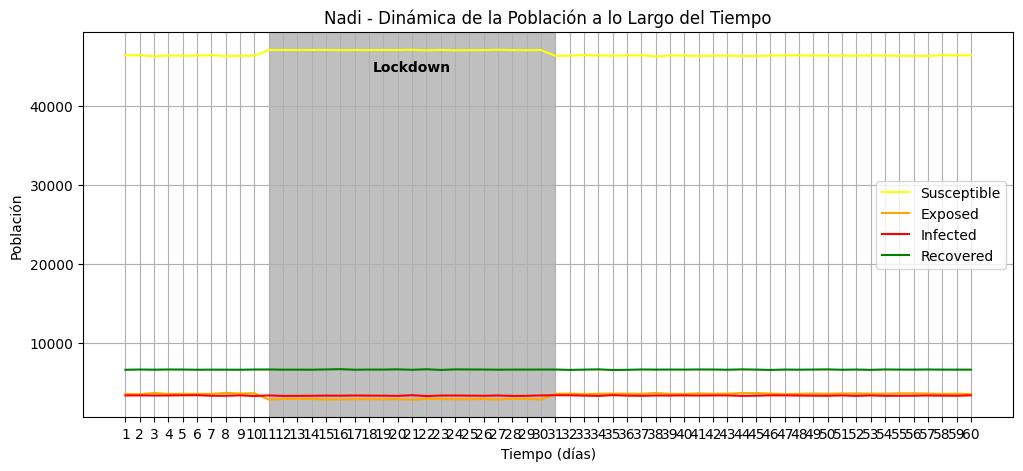

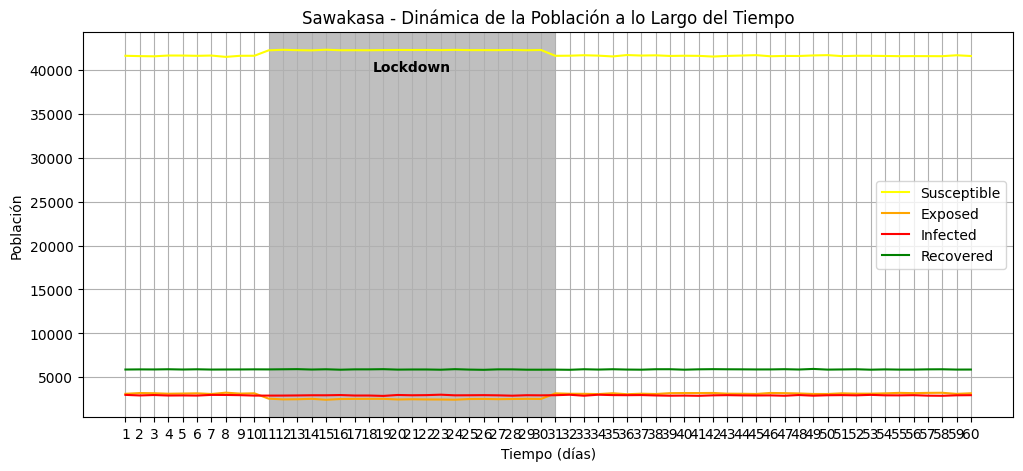

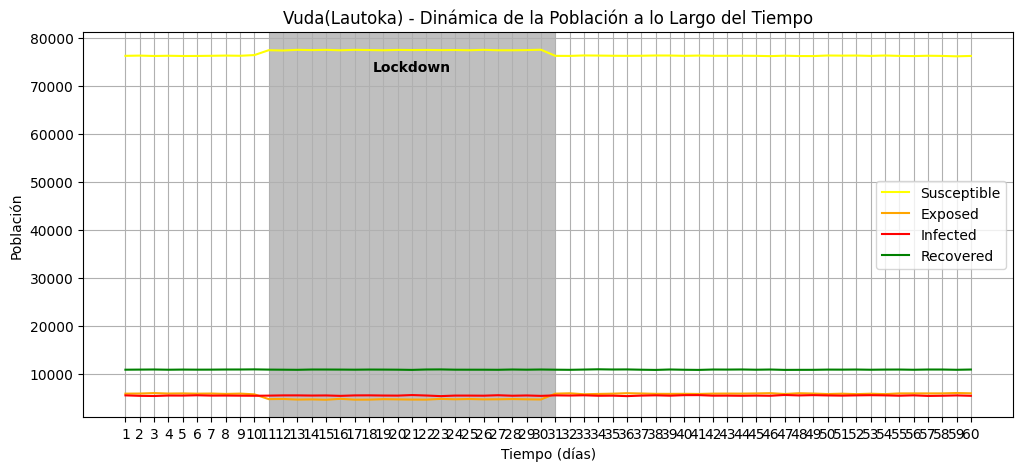

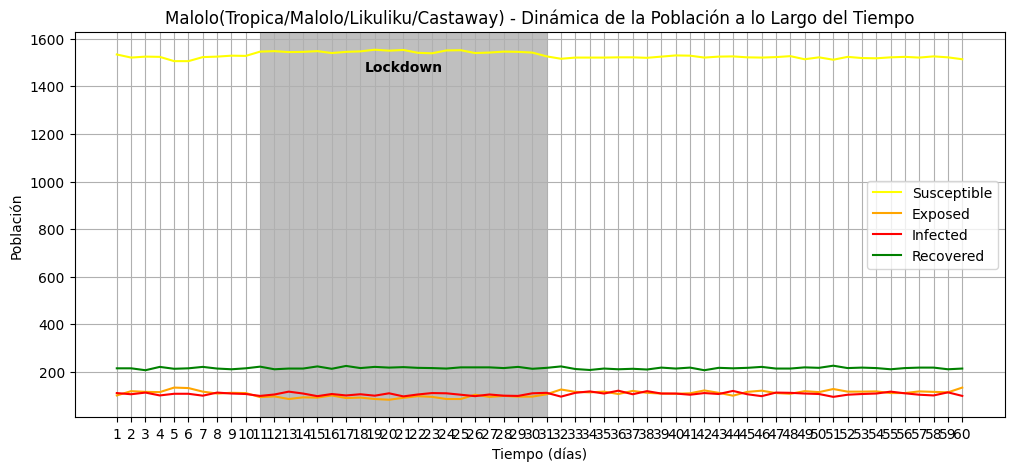

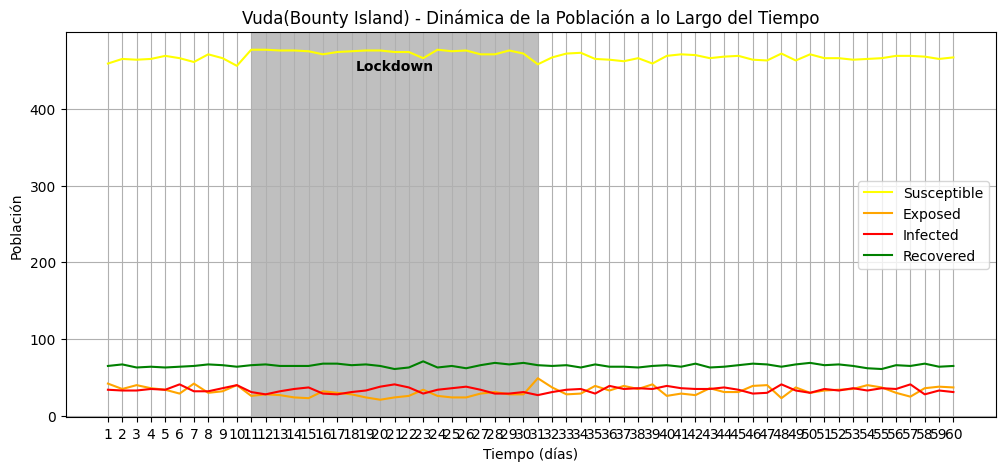

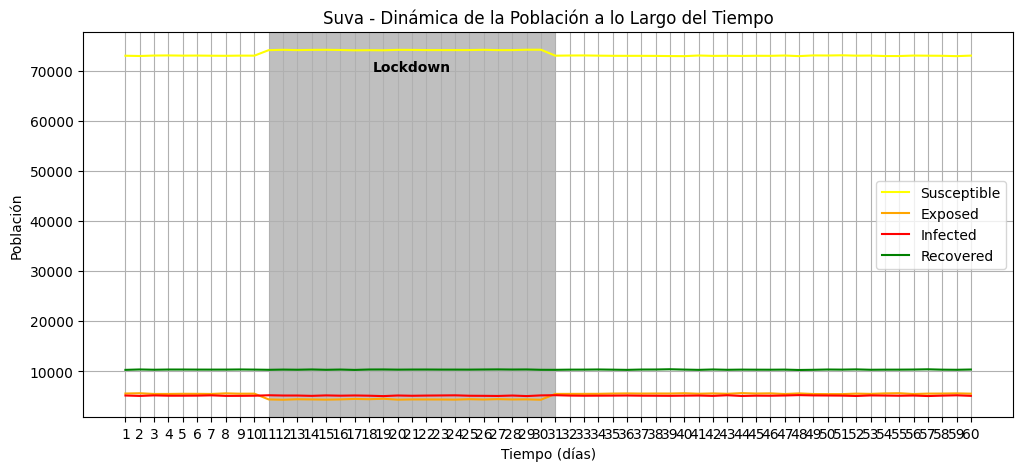

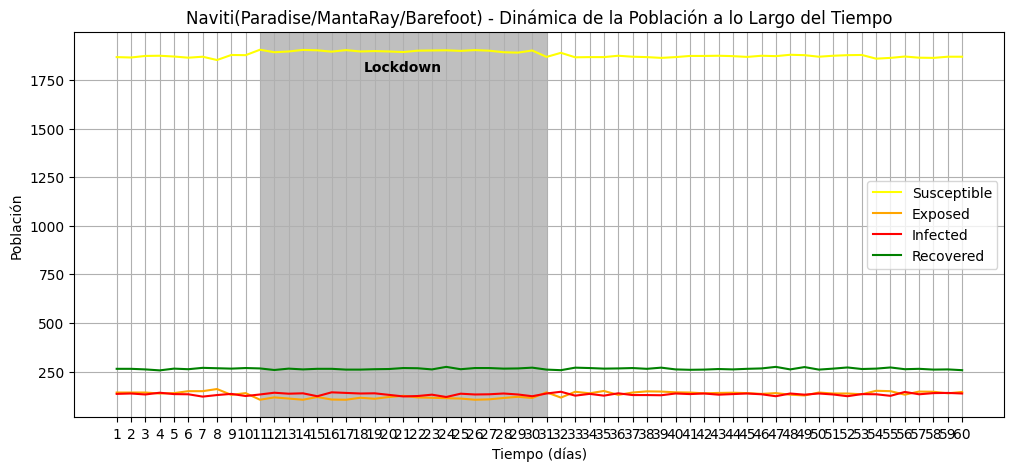

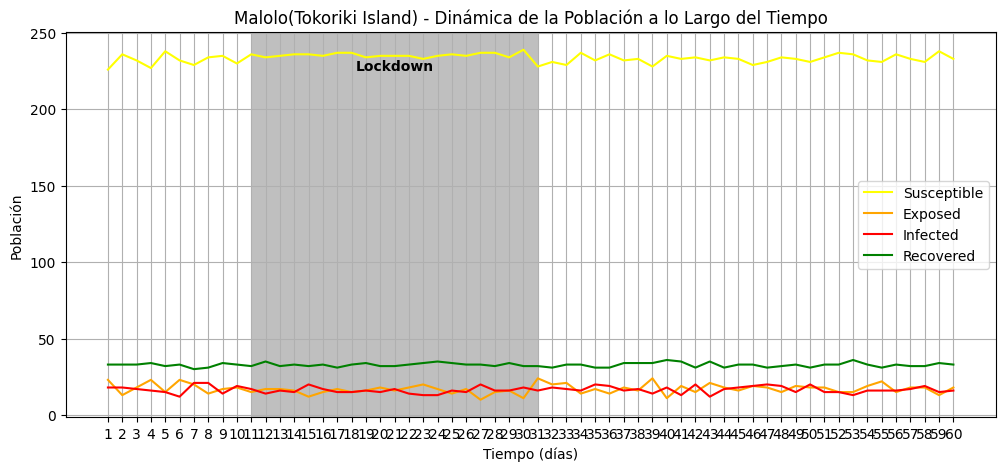

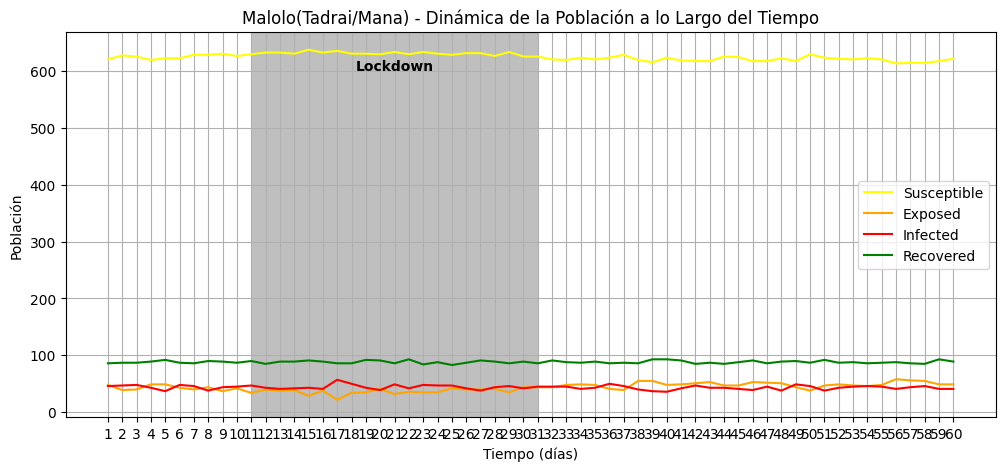

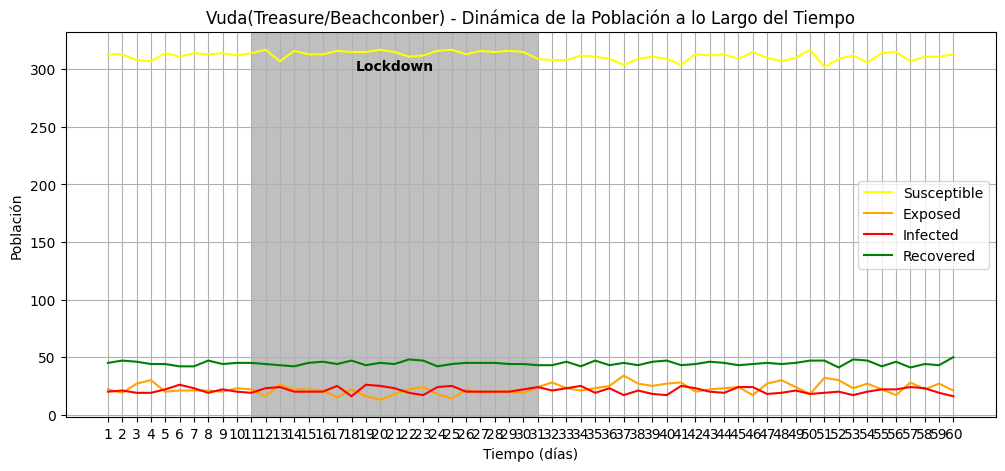

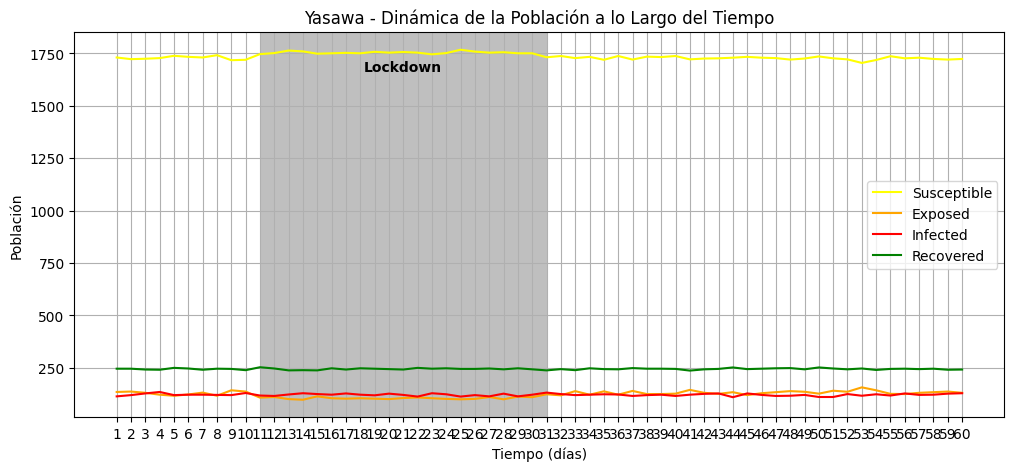

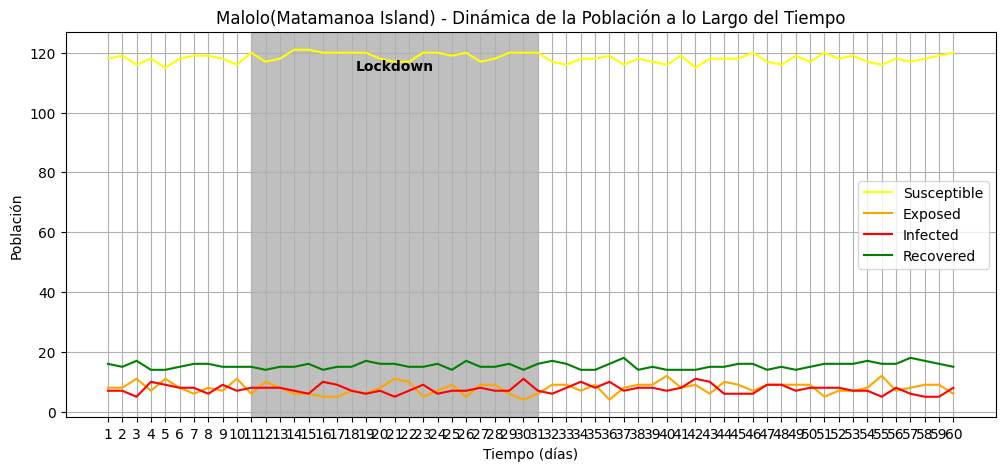

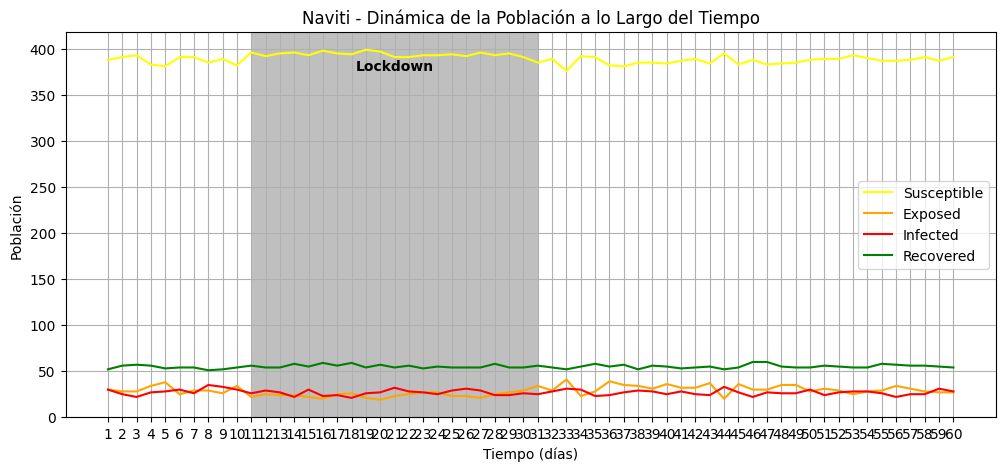

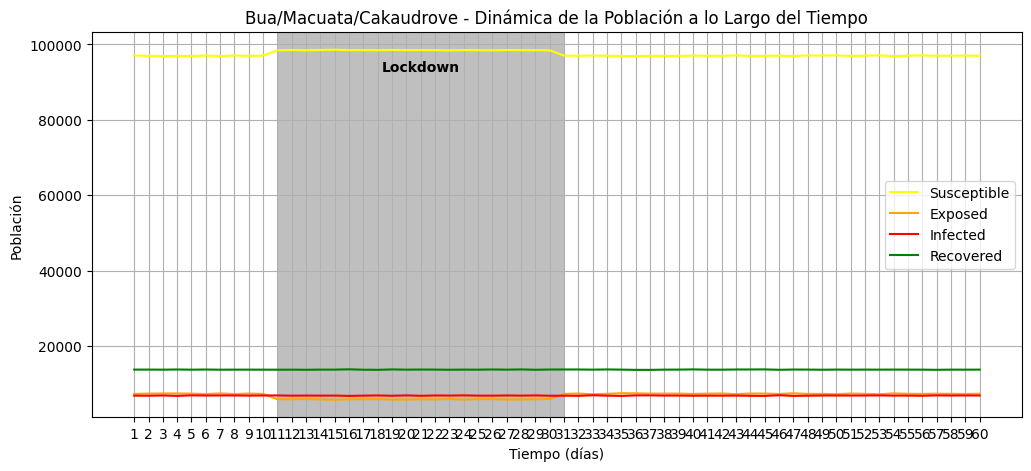

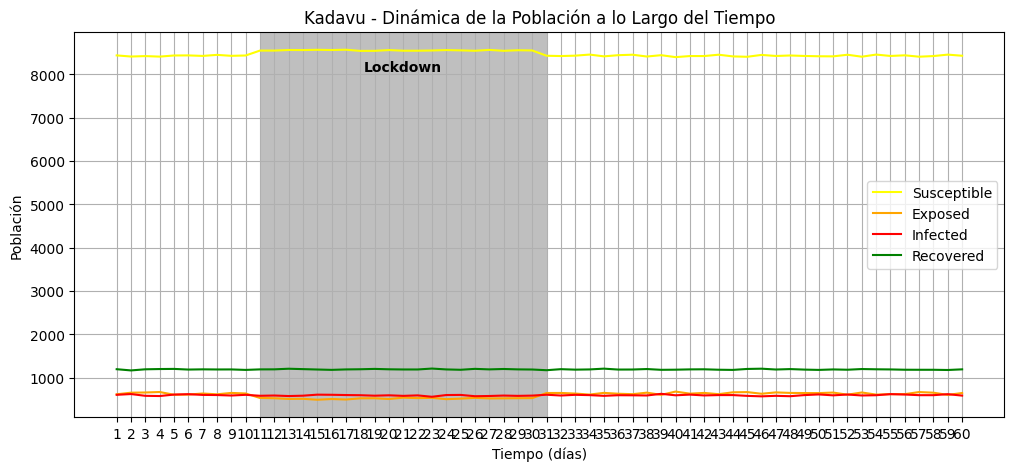

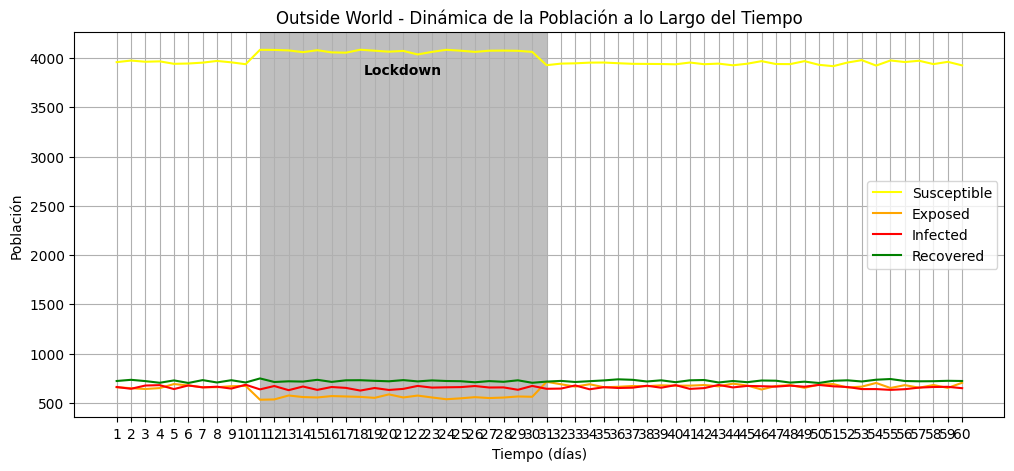

In [29]:
import matplotlib.pyplot as plt

# Etiquetas para los compartimentos de población
compartment_labels = ['Susceptible', 'Exposed', 'Infected', 'Recovered']
compartment_colors = ['yellow', 'orange', 'red', 'green']

# Parámetros de lockdown para marcar el período en los gráficos
lockdown_start = parameters['ls']
lockdown_end = lockdown_start + parameters['le']

# Plotear los resultados para cada comunidad a lo largo del tiempo
for i, community_name in enumerate(communities_ordered):
    plt.figure(figsize=(12, 5))
    for j in range(4):
        # Extraer los datos específicos del compartimento para cada comunidad
        compartment_data = history[:, i, j]
        days = np.arange(Tmax)  # Días de la simulación
        plt.plot(days, compartment_data, label=compartment_labels[j], color=compartment_colors[j])

    # Ajustar los ticks del eje x para mostrar los días desde 1
    plt.xticks(ticks=np.arange(Tmax), labels=np.arange(1, Tmax + 1))

    plt.title(f"{community_name} - Dinámica de la Población a lo Largo del Tiempo")
    plt.xlabel("Tiempo (días)")
    plt.ylabel("Población")
    plt.legend()
    plt.grid(True)  # Para mejor visualización de la cuadrícula

    # Resaltar el período de lockdown en el gráfico de cada comunidad
    if lockdown_start < Tmax and lockdown_end < Tmax:  # Asegurarse de que el lockdown está dentro del rango de la simulación
        plt.axvspan(lockdown_start, lockdown_end, color='grey', alpha=0.5, lw=0)
        plt.text((lockdown_start + lockdown_end) / 2, plt.ylim()[1] * 0.9, 'Lockdown',
                 horizontalalignment='center', color='black', weight='bold')

    plt.show()
